<a href="https://colab.research.google.com/github/laumr/data-science/blob/main/EDA_Laura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tableone > NULL

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
from scipy.stats import levene
from tableone import TableOne


In [ ]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df_airbnb = pd.read_csv(url)

In [ ]:
df_airbnb.shape

(48895, 16)

In [ ]:
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [ ]:
print (df_airbnb['id'].nunique())
df_airbnb.isnull().sum()


48895


,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
df_airbnb.drop(["name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True) #name y host name es lo mismo que dejar id y host_id. last review y reviews per month tienen 20% de datos NaN y tenemos en número de reviews aparte


In [ ]:
df_airbnb.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


### Variables categóricas: host_id, neighbourhood_group, neighbourhood, room_type, availability_365

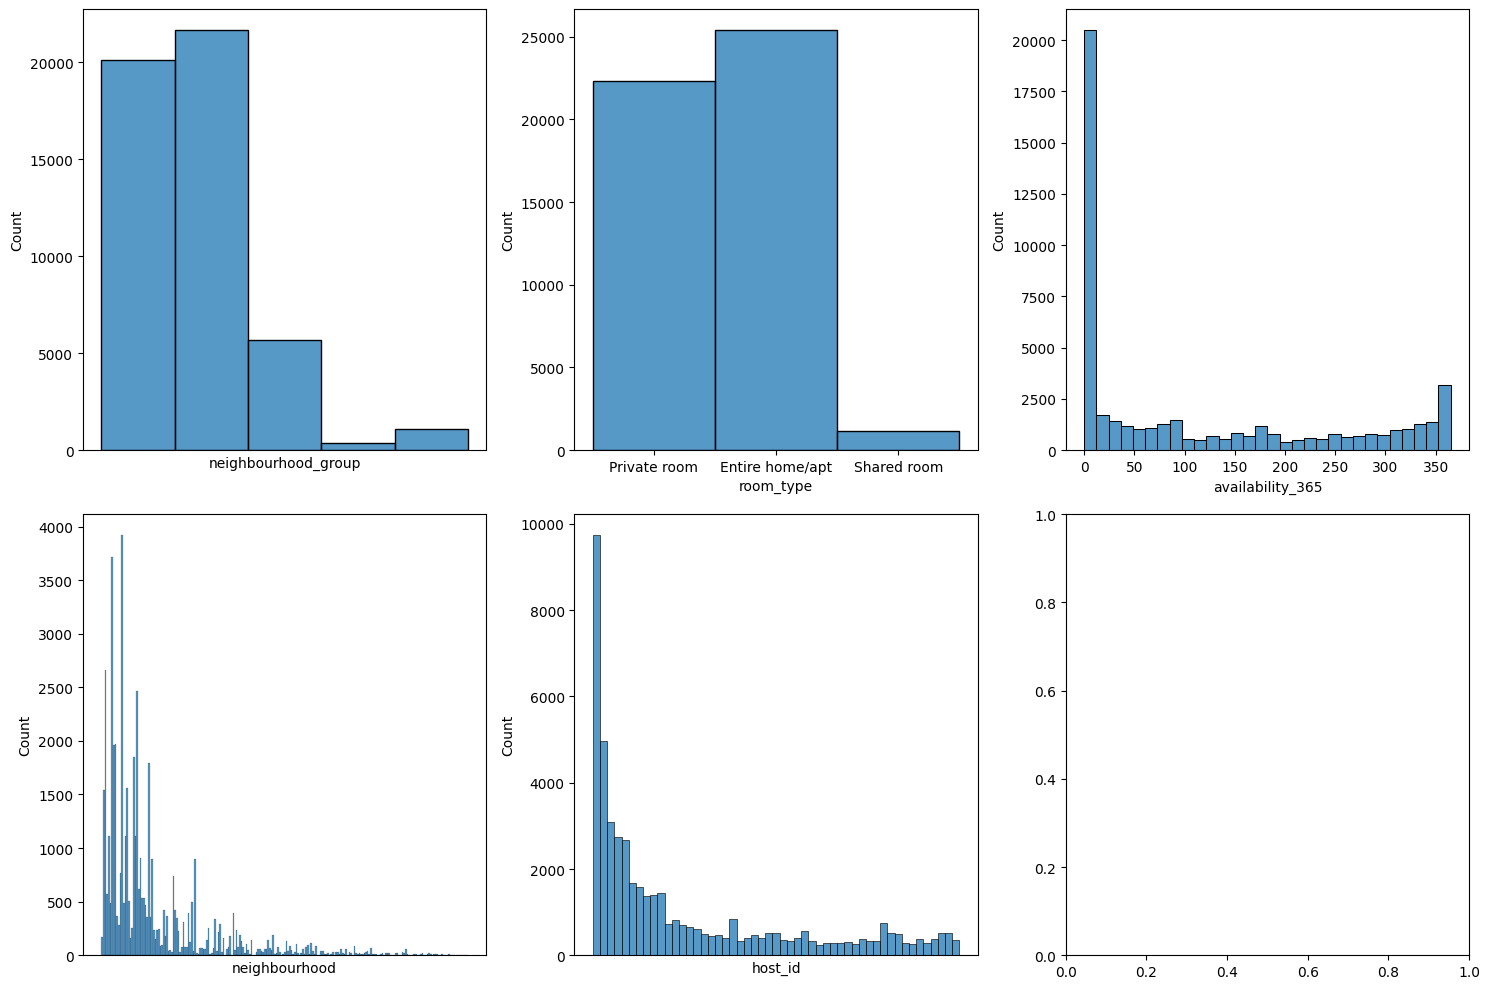

In [ ]:
fig, axis = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(ax = axis[0,0], data = df_airbnb, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,1], data = df_airbnb, x = "room_type")
sns.histplot(ax = axis[0,2], data = df_airbnb, x = "availability_365")
sns.histplot(ax = axis[1,0], data = df_airbnb, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,1], data = df_airbnb, x = "host_id").set_xticks([])

plt.tight_layout()

plt.show()


### Variables numéricas

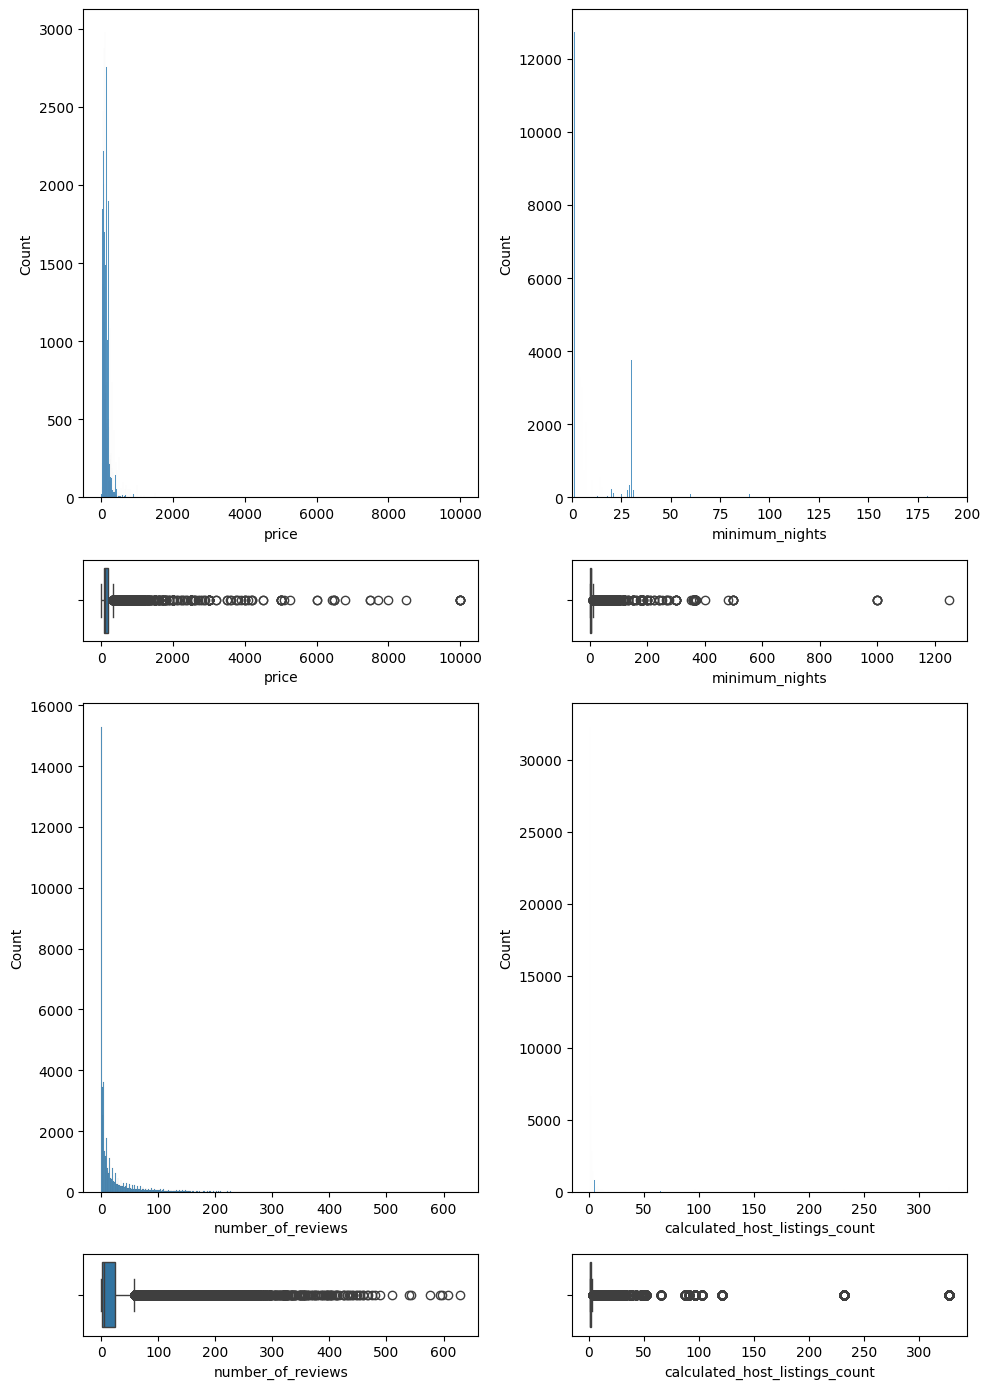

In [ ]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df_airbnb, x = "price")
sns.boxplot(ax = axis[1, 0], data = df_airbnb, x = "price")

sns.histplot(ax = axis[0, 1], data = df_airbnb, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = df_airbnb, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = df_airbnb, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = df_airbnb, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = df_airbnb, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = df_airbnb, x = "calculated_host_listings_count")

plt.tight_layout()

plt.show()

In [ ]:
categorical = ['neighbourhood_group', 'room_type','neighbourhood']
continuous = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365','calculated_host_listings_count']
nonnormal = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365','calculated_host_listings_count']


table1 = TableOne(df_airbnb,
                  columns=categorical + continuous,
                  categorical=categorical,
                   nonnormal=nonnormal)
table1

Missing             Overall
n                                                                                               48895
neighbourhood_group, n (%)                     Bronx                                       1091 (2.2)
                                               Brooklyn                                  20104 (41.1)
                                               Manhattan                                 21661 (44.3)
                                               Queens                                     5666 (11.6)
                                               Staten Island                                373 (0.8)
room_type, n (%)                               Entire home/apt                           25409 (52.0)
                                               Private room                              22326 (45.7)
                                               Shared room                                 1160 (2.4)
neighbourhood, n (%)                           Allerton                                      42 (0.1)
                                               Arden Heights                                  4 (0.0)
                                               Arrochar                                      21 (0.0)
                                               Arverne                                       77 (0.2)
                                               Astoria                                      900 (1.8)
                                               Bath Beach                                    17 (0.0)
                                               Battery Park City                             70 (0.1)
                                               Bay Ridge                                    141 (0.3)
                                               Bay Terrace                                    6 (0.0)
                                               Bay Terrace, Staten Island                     2 (0.0)
                                               Baychester                                     7 (0.0)
                                               Bayside                                       39 (0.1)
                                               Bayswater                                     17 (0.0)
                                               Bedford-Stuyvesant                          3714 (7.6)
                                               Belle Harbor                                   8 (0.0)
                                               Bellerose                                     14 (0.0)
                                               Belmont                                       24 (0.0)
                                               Bensonhurst                                   75 (0.2)
                                               Bergen Beach                                  10 (0.0)
                                               Boerum Hill                                  177 (0.4)
                                               Borough Park                                 136 (0.3)
                                               Breezy Point                                   3 (0.0)
                                               Briarwood                                     56 (0.1)
                                               Brighton Beach                                75 (0.2)
                                               Bronxdale                                     19 (0.0)
                                               Brooklyn Heights                             154 (0.3)
                                               Brownsville                                   61 (0.1)
                                               Bull's Head                                    6 (0.0)
                                               Bushwick                                    2465 (5.0)
                                               Cambria Heights                               26 

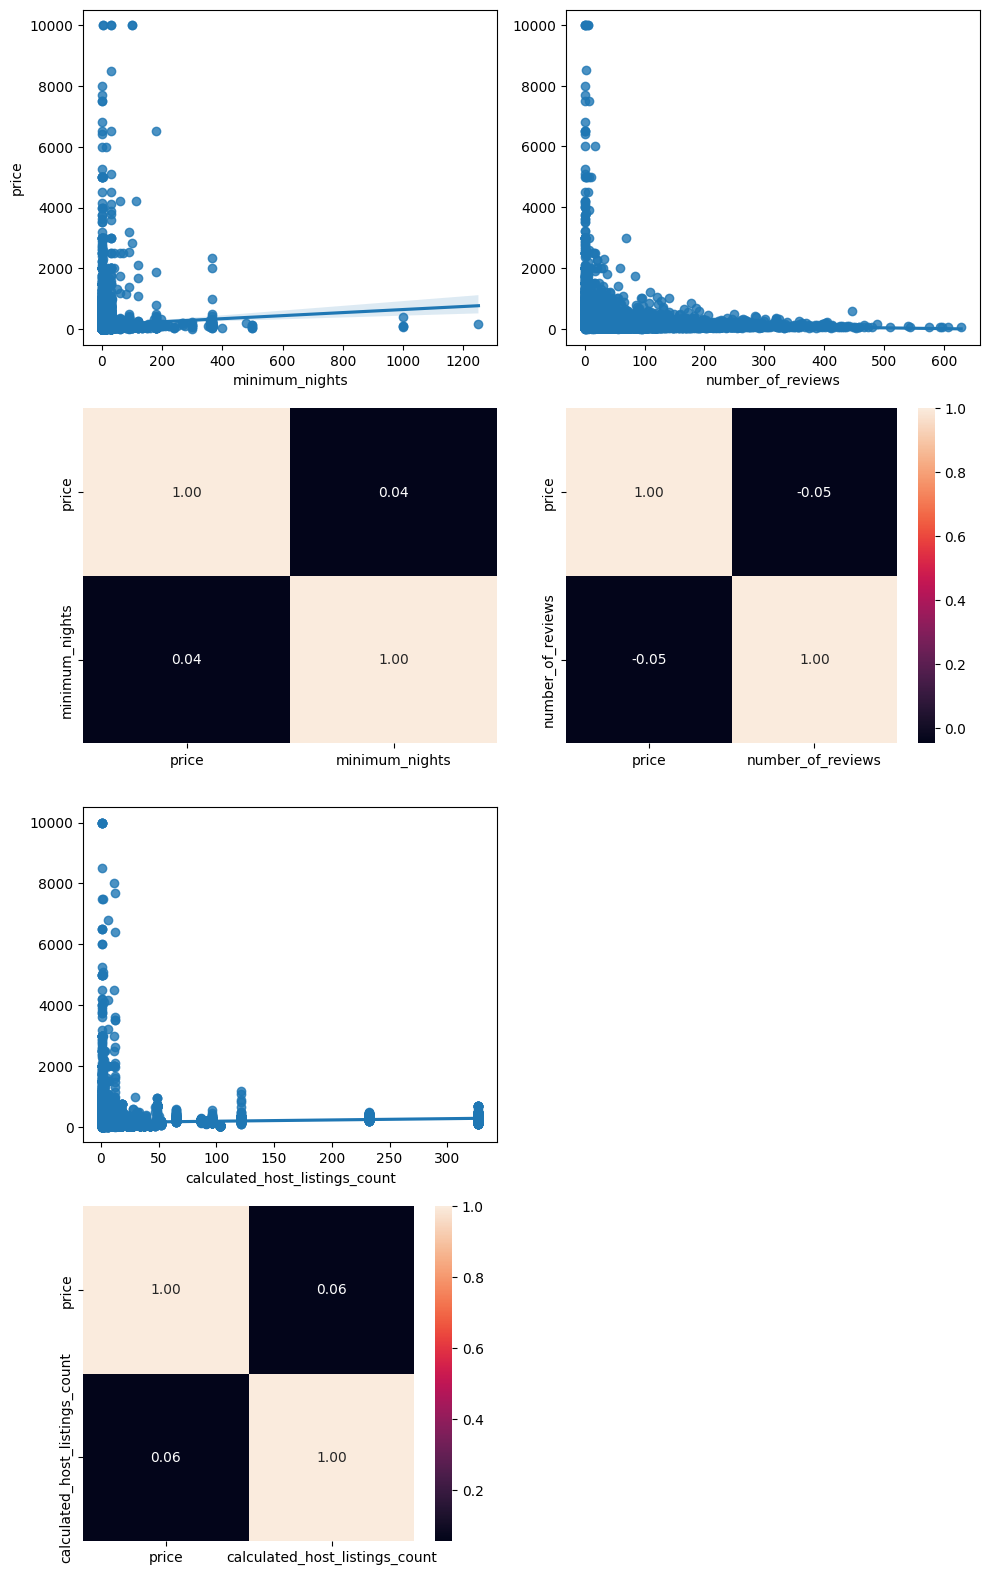

In [ ]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))


sns.regplot(ax = axis[0, 0], data = df_airbnb, x = "minimum_nights", y = "price")
sns.heatmap(df_airbnb[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df_airbnb, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(df_airbnb[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df_airbnb, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(df_airbnb[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()

plt.show()
